# **Optimized XGBoost Model**

Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.feature_selection import RFE
import numpy as np
print("Libraries imported Successfully")

Libraries imported Successfully


Load dataset

In [ ]:
data = pd.read_csv('merged_featureExtracted_ds.csv')
data.sample(40)

,SubjectNo,DFp 1,DFp 2,DF 4,TFp 1,TFp 2,TT 4,AP 3,B1F 4,B1P 3,...,G2Fp 1,G2F 3,G2P 3,Status,NN50 (beats),pNN50 (%),LF (ms2),LF Norm (n.u.),HF (ms2),LF/HF Ratio
691,692,0.240822,0.164307,0.394578,0.562681,0.526512,0.342290,-0.306022,-0.435809,-0.356654,...,0.478331,0.674980,-0.080617,High,0.130333,-0.028942,0.253923,0.283744,0.152911,0.043155
207,208,-0.551941,-0.567808,-0.548444,-0.535813,-0.703822,-0.708741,0.107958,0.962236,0.595110,...,-0.793060,-0.405859,-0.220491,Low,0.101351,0.171129,-0.218500,-0.486571,0.063072,-0.264759
103,104,0.692302,1.192353,0.199697,-0.613009,-0.589844,-0.280209,-0.026364,-0.709237,-0.845927,...,-0.881234,-0.773503,-0.469369,High,-0.323462,-0.291401,-0.371050,-0.077263,-0.356713,-0.114119
234,235,-0.618109,-0.574087,-0.516060,-0.618979,-0.618992,-0.581207,0.323902,0.829346,0.674692,...,-0.786530,-0.325726,-0.157389,Low,0.112652,0.143471,-0.185781,-0.276004,0.076682,-0.233738
257,258,-0.537752,-0.501482,-0.699934,-0.571508,-0.735562,-0.484674,0.147467,0.582251,0.610893,...,-0.775459,-0.310661,-0.264940,Low,0.077908,0.113221,-0.151366,-0.235940,-0.005470,-0.213127
283,284,-0.606731,-0.556377,-0.499734,-0.515638,-0.641232,-0.676860,0.216235,0.971068,0.869207,...,-0.715636,-0.366829,-0.225612,Low,0.105712,0.154533,-0.179827,-0.388458,-0.036259,-0.240443
424,425,0.197922,0.339267,0.629194,0.216528,0.181326,0.079444,-0.174164,-0.115195,-0.274938,...,0.207788,-0.209327,-0.001763,Medium,-0.237031,-0.171731,-0.095544,0.234065,-0.186116,0.050485
456,457,0.231650,0.562054,0.521077,0.416905,0.337103,0.236173,-0.202131,-0.233607,-0.124086,...,0.277415,-0.150270,-0.101644,Medium,-0.275251,-0.212319,-0.090312,0.050849,-0.217376,-0.009333
315,316,-0.633985,-0.496457,-0.671664,-0.584136,-0.646476,-0.570722,0.270646,0.827960,0.968814,...,-0.778868,-0.318350,-0.169765,Low,0.182369,0.071839,-0.150786,-0.453205,0.076824,-0.247337
72,73,-0.601481,-0.808757,-0.720425,-0.668691,-0.176115,-0.499597,-0.465177,-1.071616,-1.058847,...,-0.432328,-0.124253,0.435852,Medium,-0.607979,-0.493734,-0.112800,0.691227,-0.401795,0.578227


Encoding Values

In [ ]:
# Prepare the data
X = data.drop('Status', axis=1)
y = data['Status']
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

Splitting Training and Testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train.head(10)

,SubjectNo,DFp 1,DFp 2,DF 4,TFp 1,TFp 2,TT 4,AP 3,B1F 4,B1P 3,...,G1P 3,G2Fp 1,G2F 3,G2P 3,NN50 (beats),pNN50 (%),LF (ms2),LF Norm (n.u.),HF (ms2),LF/HF Ratio
56,57,0.124381,0.830277,0.885704,0.597663,0.820755,3.890242,0.676080,-0.836949,-0.724523,...,1.751741,2.592230,4.223526,6.898427,-0.696890,-0.554901,-0.615962,-0.770891,-0.577934,-0.396851
204,205,-0.589507,-0.655006,-0.733994,-0.635905,-0.683116,-0.673032,0.272623,0.572963,0.705808,...,-0.347225,-0.746622,-0.343285,-0.160136,0.044734,0.166688,-0.150247,-0.359750,0.041799,-0.219173
319,320,0.385587,0.271830,0.706976,0.211833,0.142646,0.275882,-0.194455,-0.185760,-0.143453,...,0.043755,0.292705,-0.108704,-0.023539,-0.225490,-0.177615,-0.108104,0.156962,-0.215452,0.075799
529,530,0.250236,0.196047,0.280798,0.297383,0.566172,-0.038061,-0.256846,-0.265533,-0.361775,...,0.405710,0.509505,0.511846,0.042019,0.066911,0.013803,0.344869,0.209658,0.227327,0.069628
24,25,-1.085780,-1.144668,-1.281798,-1.236716,-1.183783,-1.312180,-0.351053,-1.203583,-0.936555,...,-1.125006,-0.637556,-0.634537,-0.525828,-0.607979,-0.479528,-0.372658,0.017515,-0.386104,-0.059460
231,232,-0.626272,-0.655765,-0.629945,-0.478977,-0.608685,-0.512762,0.325508,0.729481,0.908075,...,-0.277435,-0.748832,-0.371794,-0.252306,0.111191,0.076072,-0.198944,-0.476798,0.014373,-0.270760
174,175,-0.552531,-0.486521,-0.596779,-0.633757,-0.588151,-0.442399,0.035334,0.573829,0.700662,...,-0.410456,-0.731867,-0.315320,-0.217100,0.124660,0.167959,-0.190139,-0.288429,-0.055430,-0.234559
296,297,-0.545122,-0.490957,-0.664862,-0.627922,-0.609399,-0.476690,0.191993,0.967966,0.989667,...,-0.429212,-0.724299,-0.330690,-0.200388,0.170092,0.163956,-0.179517,-0.394921,0.052890,-0.219578
630,631,0.321849,0.512461,0.523411,0.311950,0.584545,0.257990,-0.255527,-0.416583,-0.314361,...,0.549041,0.496893,0.487182,-0.043976,0.091150,-0.040453,0.183948,0.186520,0.098636,-0.056703
545,546,0.336482,0.262937,0.553107,0.690516,0.403516,0.367980,-0.253084,-0.397261,-0.373108,...,0.493155,0.252481,0.551238,-0.001596,0.028523,-0.056059,0.194475,0.142065,0.156009,-0.011771


In [ ]:
X_test.head(10)

,SubjectNo,DFp 1,DFp 2,DF 4,TFp 1,TFp 2,TT 4,AP 3,B1F 4,B1P 3,...,G1P 3,G2Fp 1,G2F 3,G2P 3,NN50 (beats),pNN50 (%),LF (ms2),LF Norm (n.u.),HF (ms2),LF/HF Ratio
120,121,-0.543955,-0.610149,-0.569390,-0.555760,-0.758603,-0.518147,0.033366,0.529492,0.829025,...,-0.441094,-0.720776,-0.421201,-0.279334,0.126411,0.072146,-0.223085,-0.346742,-0.057624,-0.296900
331,332,0.267412,0.384454,0.672306,0.424713,0.168361,0.126170,-0.214594,-0.188352,-0.215303,...,-0.096837,0.471548,-0.276530,0.015879,-0.257415,-0.180570,-0.137498,-0.002301,-0.130511,-0.043462
39,40,-1.163532,-1.261538,-1.291269,-1.114280,-1.117159,-1.020885,-0.010663,0.396476,-0.350149,...,-1.254971,-0.048045,-0.669566,-0.569095,-0.554632,-0.430772,-0.471246,-0.702082,-0.294628,-0.375755
636,637,0.430595,0.286245,0.228501,0.647207,0.661863,0.195628,-0.162290,-0.296435,-0.374553,...,0.571658,0.466255,0.662004,0.093293,0.091609,0.021974,0.360215,0.084472,0.153469,0.033057
514,515,0.365613,0.380900,0.588533,0.209394,0.158633,0.234271,-0.350672,-0.232492,-0.315301,...,0.161995,0.483418,-0.267476,-0.032271,-0.257481,-0.208549,-0.105973,0.325811,-0.167815,0.029595
532,533,0.344539,0.177265,0.347424,0.323372,0.493710,0.317646,-0.197095,-0.376417,-0.421283,...,0.461281,0.353980,0.469972,0.110679,0.066294,0.050605,0.321690,-0.033972,0.243594,0.042891
65,66,-0.303938,-0.293349,-0.089828,-0.748490,-0.745952,-0.138984,-0.243662,-0.536163,-0.137565,...,1.968080,0.217393,-0.312211,1.883481,0.867952,0.756166,-0.306124,0.175248,-0.380020,0.070601
500,501,0.489309,0.593333,0.275563,0.257602,0.523813,0.104464,-0.190370,-0.192778,-0.132027,...,0.040205,0.419238,-0.145697,-0.021793,-0.227864,-0.194636,-0.115015,0.140631,-0.151680,0.059267
78,79,-0.587400,-0.435372,-0.451920,-0.521757,-0.307366,1.129596,0.008672,-0.324055,-0.637790,...,-0.589668,1.237347,-0.186931,0.408153,3.215215,4.254597,0.224010,-1.682817,5.275225,-0.602314
654,655,0.404986,0.234030,0.481229,0.578477,0.628704,-0.033249,-0.070985,-0.355396,-0.435655,...,0.419660,0.427730,0.491634,0.005635,0.084130,0.028836,0.255875,0.087587,0.246620,0.044932


Feature Scaling

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Training set:\n")
print(X_train_scaled)
print("Testing set:\n")
print(X_test_scaled)

Training set:

[[-1.48753381  0.19890546  1.37598011 ... -1.92713062 -1.74221702
  -0.97948833]
 [-0.76749399 -0.96651149 -1.09062917 ... -0.90704249  0.16318551
  -0.54544779]
 [-0.20800358  0.62532211  0.44856704 ...  0.37497968 -0.62774816
   0.17512471]
 ...
 [-0.44639514 -1.04076534 -0.94293177 ... -0.65214465  0.03021743
  -0.6953848 ]
 [ 0.35635196  0.51360416  0.58978246 ...  0.87546188 -0.61683603
   0.144797  ]
 [-1.26373765 -1.19670118 -1.38990427 ... -2.17981398 -1.01420648
  -1.05025701]]
Testing set:

[[-1.17616524 -0.89214811 -1.0161348  ... -0.87476994 -0.14249843
  -0.73532176]
 [-0.14962197  0.43240165  0.63560255 ... -0.02017025 -0.36659296
  -0.11621057]
 [-1.57024109 -1.90360226 -2.09789737 ... -1.75640835 -0.8711783
  -0.92795296]
 ...
 [-1.56051082 -0.35012355 -0.73909461 ...  2.96977459 -1.68131198
   4.59360645]
 [-1.23454685 -1.51313431 -1.64055941 ... -1.7006943   0.48907917
  -0.91032243]
 [-0.47558595 -0.92359955 -0.93612465 ... -1.0344282  -0.13488572
  -0

XGBoost Classifier

In [ ]:
# Initialize the XGBoost classifier
model = xgb.XGBClassifier()
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


RFE

In [ ]:
# Initialize RFE
rfe = RFE(model, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train_scaled, y_train)
print("Selected features:")
print(X_train.columns[rfe.support_])

Selected features:
Index(['SubjectNo', 'TFp 1', 'TFp 2', 'G2F 3', 'NN50 (beats)'], dtype='object')


Feature Selection

In [ ]:

# Get selected features
selected_features = X.columns[rfe.support_]

# Select only the relevant features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]


Hyperparameter Tuning

In [ ]:

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'gamma': np.linspace(0, 0.5, 5),
    'reg_alpha': np.linspace(0, 0.5, 5),
    'reg_lambda': np.linspace(0, 0.5, 5),
}

# Perform Randomized Search with 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train_selected, y_train)


# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'subsample': 0.6, 'reg_lambda': 0.375, 'reg_alpha': 0.0, 'n_estimators': 800, 'max_depth': 9, 'learning_rate': 0.20333333333333334, 'gamma': 0.25, 'colsample_bytree': 0.8}


Train Model

In [ ]:
# Train the model with the best parameters
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_selected, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.20333333333333334,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Testing

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)


Accuracy

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with XGBoost Classifier after Hyperparameter Tuning and Feature Selection:", accuracy)


Accuracy with XGBoost Classifier after Hyperparameter Tuning and Feature Selection: 0.9930555555555556


Classification Report

In [ ]:
# Print classification report
print("Classification Report:")
classification_rep = classification_report(y_test, y_pred, output_dict=True)
print(tabulate(pd.DataFrame(classification_rep).transpose(), headers='keys', tablefmt='fancy_grid'))
import seaborn as sns


Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤════════════╕
│              │   precision │   recall │   f1-score │    support │
╞══════════════╪═════════════╪══════════╪════════════╪════════════╡
│ 0            │    1        │ 0.979167 │   0.989474 │  48        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ 1            │    1        │ 1        │   1        │  44        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ 2            │    0.981132 │ 1        │   0.990476 │  52        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ accuracy     │    0.993056 │ 0.993056 │   0.993056 │   0.993056 │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ macro avg    │    0.993711 │ 0.993056 │   0.993317 │ 144        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ weighted avg │    0.993187 │ 0.993056 │   0.993052 │ 144        │
╘══════════════╧═════════

Confusion Matrix

Confusion Matrix:
[[47  0  1]
 [ 0 44  0]
 [ 0  0 52]]


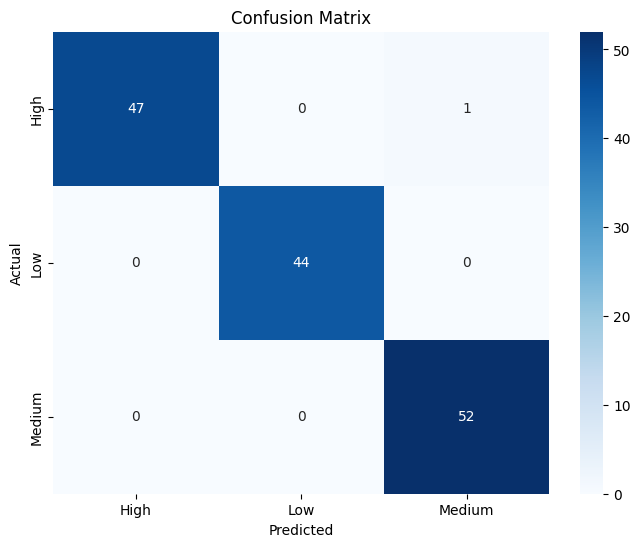

In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Graphical Representation

Accuracy Percentage:   99.30555555555556 %


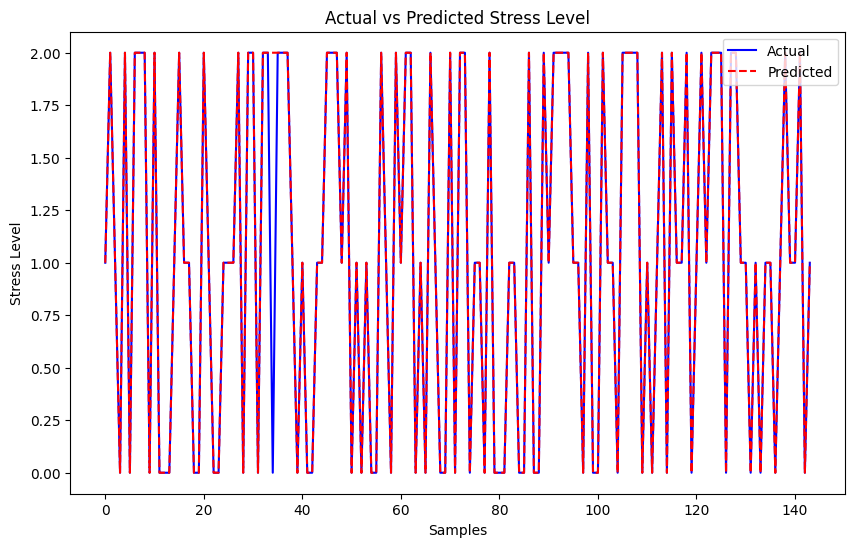

In [ ]:
print("Accuracy Percentage:  ", accuracy*100 ,"%")
# Plot actual vs predicted stress levels
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Stress Level')
plt.title('Actual vs Predicted Stress Level')
plt.legend()
plt.show()